# Reciprocal cycles

[Problem Link](https://projecteuler.net/problem=26)

## Problem Description

A unit fraction contains 1 in the numerator. The decimal representation of the unit fractions with denominators 2 to 10 are given:

    1/2	= 	0.5
    1/3	= 	0.(3)
    1/4	= 	0.25
    1/5	= 	0.2
    1/6	= 	0.1(6)
    1/7	= 	0.(142857)
    1/8	= 	0.125
    1/9	= 	0.(1)
    1/10	= 	0.1 

Where 0.1(6) means 0.166666..., and has a 1-digit recurring cycle. It can be seen that 1/7 has a 6-digit recurring cycle.

Find the value of d < 1000 for which 1/d contains the longest recurring cycle in its decimal fraction part.


## Algorithm

Let's examine the **1 / 7** case, which is **0.(142857)**, now

If you divide 10 by 7, you get **1** as solution and 3 as remainder.

3 * 10 = 30 and if you divide 30 by 7, you get **4** as solution and 2 as remainder,

2 * 10 = 20 and if you divide 20 by 7, you get **2** as solution and 6 as remainder,

if you divide 60 by 7 you get **8** as solution and 4 as remainder, and so on and so forth, you get the idea...

Until you divide 50 by 7, get **7** as result and 1 as a remainder, next step would be to divide 10 by 7 and that would cause a cycle as we already calculated it at the beginning.

Hence, we can say that 142857 part cycles in **1 / 7** without calculating further.

We'll start by defining a function to calculate and return cycle for us.

In [1]:
def find_cycle(num: int) -> str:
    """ Finds the cycle (if any) in 1 / num """
    dividends = [] # This will hold the dividends in the cycle
    cycle = "" # This will hold the current cycle
    
    dividend = 10 # number to divide the number by
    while True:
        if dividend < num:
            dividend *= 10
        elif dividend > num:
            if dividend not in dividends:
                dividends.append(dividend)
                quotient, remainder = dividend // num, dividend % num
                cycle += str(quotient)
                if dividend % num == 0:
                    return ""
                else:
                    dividend = remainder
            else:
                return cycle
        else:
            return cycle

Let's test the function

In [2]:
for i in range(2, 10):
    print(i, find_cycle(i))

2 
3 3
4 
5 
6 16
7 142857
8 
9 1


Seems like it's working, now onto calculating cycles for every number lesser than 1000:

In [3]:
from euler.utils.timing import print_exec_time
import numpy as np

def find_answer():
    cycle_lengths = [len(find_cycle(x)) for x in range(2, 1000)]
    biggest_idx = np.argmax(cycle_lengths)
    
    # 2 is added because range starts from 2 and not 0 so for example the 10th element in the list would be 12
    print(f"Number {2 + biggest_idx} has the biggest cycle with {cycle_lengths[biggest_idx]} elements.")
    
print_exec_time(find_answer)

Number 983 has the biggest cycle with 884 elements.
Execution time: 0.2168 seconds.


## Additional Stuff

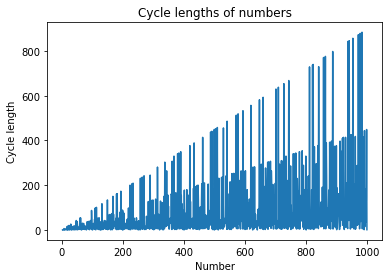

In [4]:
import matplotlib.pyplot as plt

indices = np.arange(2, 1000)
cycle_lengths = [len(find_cycle(x)) for x in range(2, 1000)]

fig, ax = plt.subplots()
ax.plot(indices, cycle_lengths)
ax.set_xlabel('Number')
ax.set_ylabel('Cycle length')
ax.set_title("Cycle lengths of numbers")

plt.show()